# UNITED NATIONS PROJECT (starts with question 3)

## Question 3: Import the required packages with their customary aliases as follows:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Question 4: Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


In [5]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')

In [6]:
gdp_df.head(2)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN


In [7]:
gdp_df.tail(2)

,Country or Area,Year,Value,Value Footnotes
8217,Zimbabwe,1991,4126.405247,NaN
8218,Zimbabwe,1990,4013.299059,NaN


## Question 5: How many rows and columns are in gdp_df? What are the data types of each column?

In [9]:
gdp_df.shape

(8219, 4)

8,219 rows, 4 columns

In [11]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

## Question 5: Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [13]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.head(2)

,Country or Area,Year,Value
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168


In [14]:
gdp_df = gdp_df.rename(columns = {'Country or Area':'country','Year':'year','Value':'gdp_per_capita'})
gdp_df.head(2)

,country,year,gdp_per_capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168


In [15]:
gdp_df.head(2)

,country,year,gdp_per_capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168


## Question 7: How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [17]:
gdp_df.country.nunique()

247

There are 247 countries

In [19]:
year_counts = gdp_df.groupby('country')['year'].nunique()

In [20]:
year_counts

country
Afghanistan                    24
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
                               ..
Virgin Islands                 21
West Bank and Gaza             30
World                          34
Zambia                         34
Zimbabwe                       34
Name: year, Length: 247, dtype: int64

In [21]:
year_total = gdp_df.year.nunique()
year_total

34

In [22]:
countries_all_years = year_counts.loc[year_counts == year_total]
countries_all_years

country
Africa Eastern and Southern    34
Africa Western and Central     34
Albania                        34
Algeria                        34
Andorra                        34
                               ..
Vanuatu                        34
Viet Nam                       34
World                          34
Zambia                         34
Zimbabwe                       34
Name: year, Length: 228, dtype: int64

228 Countries - "Length:228"

In [24]:
countries_notall_years = year_counts.loc[year_counts != year_total]
countries_notall_years

country
Afghanistan                  24
Bhutan                       33
Cayman Islands               18
CuraÃ§ao                     24
Djibouti                     11
Faroe Islands                16
Greenland                    32
Kosovo                       16
Lebanon                      33
Montenegro                   27
San Marino                   26
Serbia                       29
Sint Maarten (Dutch part)    15
Somalia                      33
Syrian Arab Republic         33
Tonga                        33
Turks and Caicos Islands     13
Virgin Islands               21
West Bank and Gaza           30
Name: year, dtype: int64

The list above is all the countries that don't have data for every year.

In [26]:
gdp_df.year.value_counts()

year
2021    247
2020    247
2019    247
2018    247
2017    247
2016    247
2015    247
2014    247
2013    247
2012    246
2022    246
2011    246
2010    245
2009    245
2008    244
2007    242
2006    242
2005    241
2004    241
2003    241
2002    241
2000    240
2023    240
2001    240
1999    238
1998    238
1997    238
1996    236
1995    236
1994    235
1993    234
1992    234
1991    234
1990    233
Name: count, dtype: int64

It looks like more countries are added to this list as time goes on and from 2013 to 2021 the number was the same..

## Question 8: In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [29]:
gdp_per_capita2020 = gdp_df.loc[gdp_df.year == 2020]
gdp_per_capita2020

,country,year,gdp_per_capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
61,Africa Western and Central,2020,4622.731427
95,Albania,2020,14650.395929
129,Algeria,2020,14194.155748
...,...,...,...
8068,Virgin Islands,2020,45055.782930
8090,West Bank and Gaza,2020,5423.682547
8120,World,2020,18600.986362
8154,Zambia,2020,3391.595412


In [30]:
gdp_per_capita2020_noyear = gdp_per_capita2020.drop(columns = ['year'])
gdp_per_capita2020_noyear

,country,gdp_per_capita
3,Afghanistan,2769.685745
27,Africa Eastern and Southern,3861.111238
61,Africa Western and Central,4622.731427
95,Albania,14650.395929
129,Algeria,14194.155748
...,...,...
8068,Virgin Islands,45055.782930
8090,West Bank and Gaza,5423.682547
8120,World,18600.986362
8154,Zambia,3391.595412


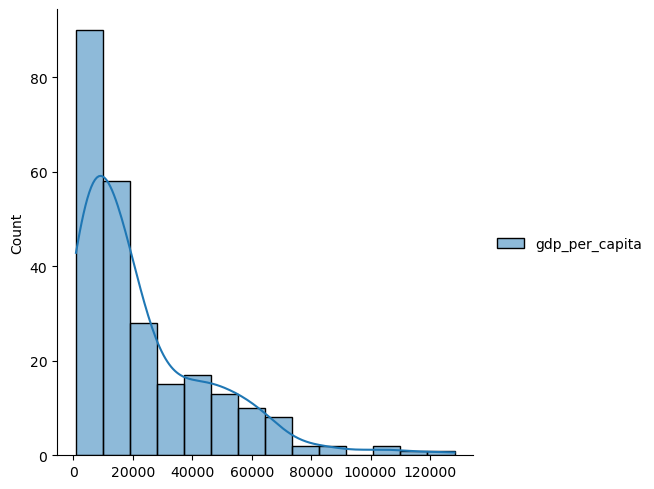

In [31]:
# Plot the histogram thanks to the displot function
sns.displot( data=gdp_per_capita2020_noyear, kde=True );

HISTOGRAM

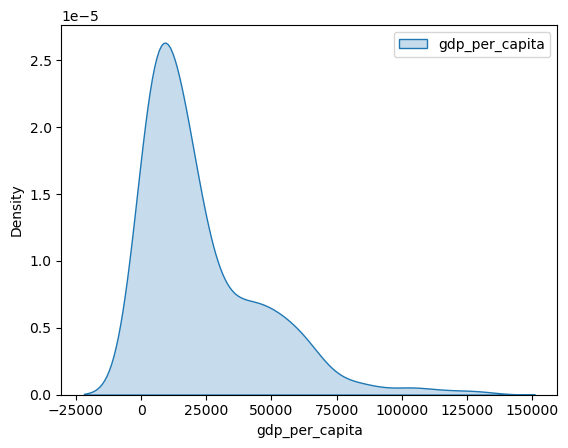

In [33]:
sns.kdeplot(gdp_per_capita2020_noyear, fill=True)
plt.xlabel('gdp_per_capita');

DENSITY PLOT

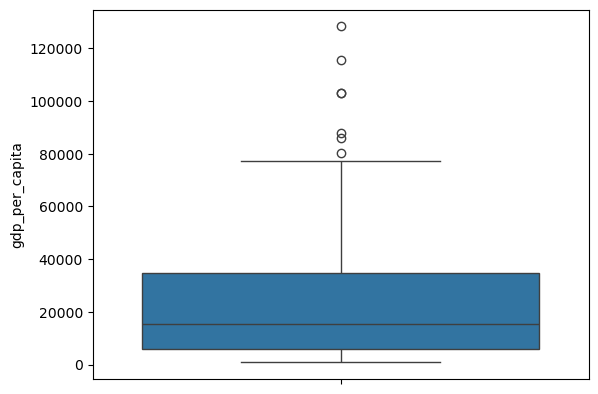

In [35]:
sns.boxplot(y=gdp_per_capita2020.gdp_per_capita);

BOX PLOT

In [37]:
%whos DataFrame

Variable                    Type         Data/Info
--------------------------------------------------
gdp_df                      DataFrame              country  year  <...>\n[8219 rows x 3 columns]
gdp_per_capita2020          DataFrame                             <...>n\n[247 rows x 3 columns]
gdp_per_capita2020_noyear   DataFrame                             <...>n\n[247 rows x 2 columns]


<Axes: ylabel='gdp_per_capita'>

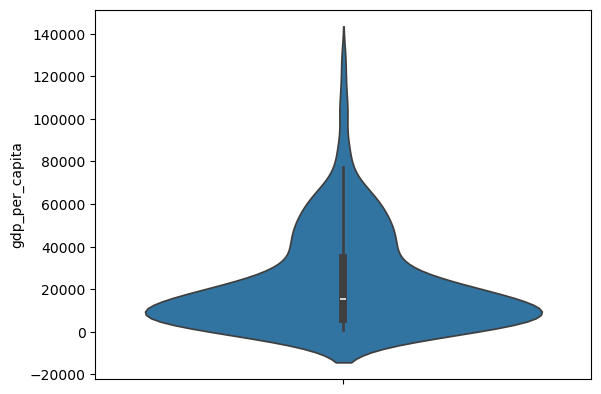

In [38]:
sns.violinplot(y=gdp_per_capita2020.gdp_per_capita)

VIOLIN PLOT

## Question 9: What was the median GDP per capita value in 2020?

In [41]:
gdp_per_capita2020.gdp_per_capita.median()

15309.23598817024

## Question 10: For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

1: A boxplot

2: A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)

3: A scatterplot
   
4: A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [43]:
gdp_decades = gdp_df.loc[gdp_df.year.isin([1990, 2000, 2010, 2020])]
gdp_decades

,country,year,gdp_per_capita
3,Afghanistan,2020,2769.685745
13,Afghanistan,2010,2848.586061
23,Afghanistan,2000,1617.826475
27,Africa Eastern and Southern,2020,3861.111238
37,Africa Eastern and Southern,2010,3863.836012
...,...,...,...
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823
8198,Zimbabwe,2010,2572.769992
8208,Zimbabwe,2000,4071.022001


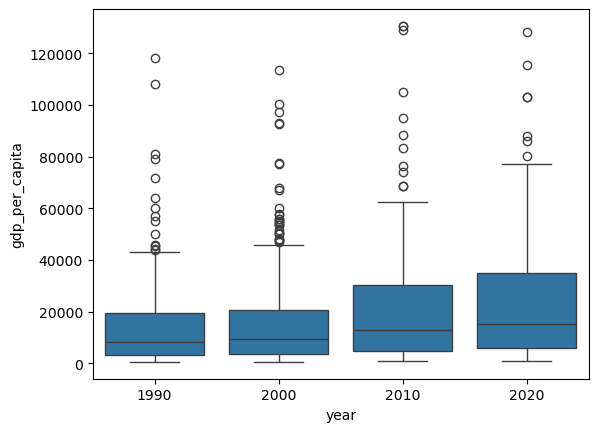

In [44]:
sns.boxplot(x=gdp_decades.year, y=gdp_decades.gdp_per_capita);

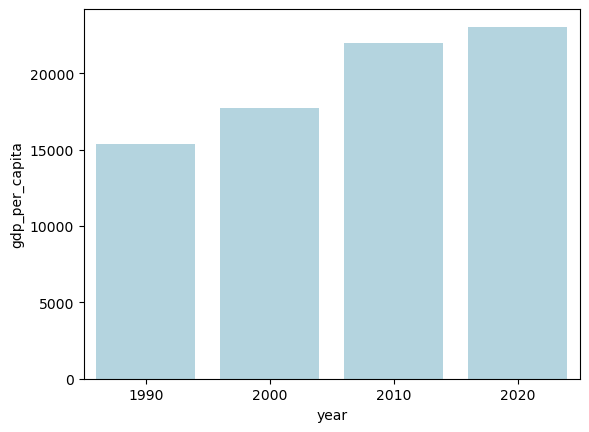

In [45]:
sns.barplot(x='year', y='gdp_per_capita', data=gdp_decades, errorbar=None,color='lightblue');

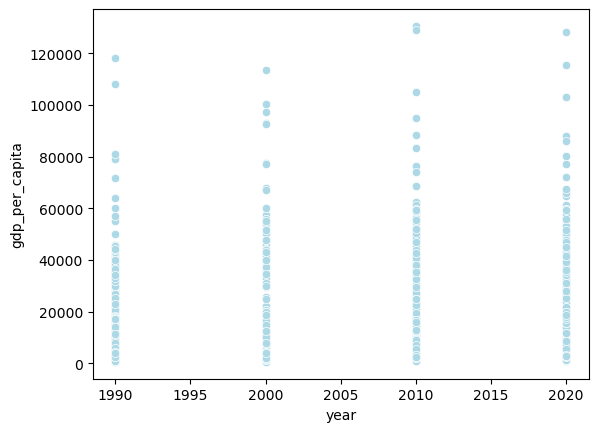

In [46]:
sns.scatterplot(x='year', y='gdp_per_capita', data=gdp_decades,color='lightblue');

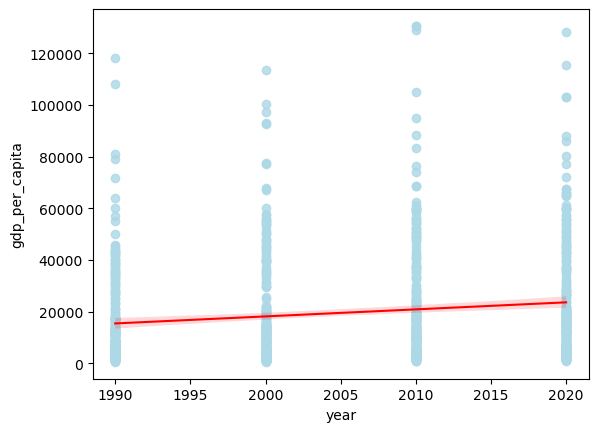

In [47]:
sns.regplot(x='year', y='gdp_per_capita', data=gdp_decades, line_kws={'color': 'red', 'linewidth': 1.5}, color = 'lightblue');

## Question 11: Which country was the first to have a GDP per capita greater than $100,000?

In [49]:
gdp_df.head(2)

,country,year,gdp_per_capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168


In [50]:
over100k = gdp_df.loc[(gdp_df.gdp_per_capita > 100000)]

In [51]:
over100k.loc[over100k.year == over100k.year.min()]

,country,year,gdp_per_capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464


United Arab Emirates & Brunei were the first to eclipse $100,000 gdp in 1990

### Question 12: Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [54]:
gdp_sorted1 = gdp_df.loc[gdp_df.year == 2020].sort_values(by = 'gdp_per_capita', ascending = False)
gdp_sorted1.head(1)

,country,year,gdp_per_capita
4426,Luxembourg,2020,128256.560341


In [55]:
gdp_lux = gdp_df.loc[gdp_df.country == 'Luxembourg']
gdp_lux.head()

,country,year,gdp_per_capita
4423,Luxembourg,2023,130373.477942
4424,Luxembourg,2022,134507.667531
4425,Luxembourg,2021,135379.291201
4426,Luxembourg,2020,128256.560341
4427,Luxembourg,2019,131609.099616


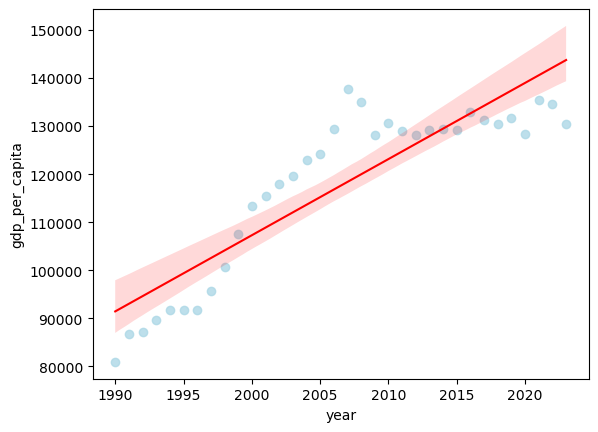

In [56]:
sns.regplot(x='year', y='gdp_per_capita', data=gdp_lux, line_kws={'color': 'red', 'linewidth': 1.5}, color = 'lightblue');

## Question 13: Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. <u>Bonus question</u>: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [58]:
gdp_sorted1 = gdp_df.loc[gdp_df.year == 2020].sort_values(by = 'gdp_per_capita', ascending = True)
gdp_sorted1.head(1)

,country,year,gdp_per_capita
1046,Burundi,2020,833.920257


In [59]:
gdp_burundi = gdp_df.loc[gdp_df.country == 'Burundi']
gdp_burundi.head()

,country,year,gdp_per_capita
1043,Burundi,2023,828.861074
1044,Burundi,2022,829.387160
1045,Burundi,2021,836.665571
1046,Burundi,2020,833.920257
1047,Burundi,2019,855.732720


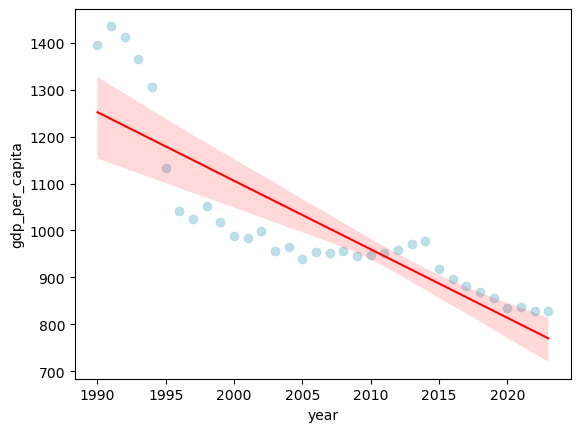

In [60]:
sns.regplot(x='year', y='gdp_per_capita', data=gdp_burundi, line_kws={'color': 'red', 'linewidth': 1.5}, color = 'lightblue');

In [61]:
gdp_2 = gdp_df.loc[(gdp_df.year == 2020) | (gdp_df.year == 1990)]
gdp_2

,country,year,gdp_per_capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238
57,Africa Eastern and Southern,1990,3386.854480
61,Africa Western and Central,2020,4622.731427
91,Africa Western and Central,1990,3299.401375
...,...,...,...
8150,World,1990,11207.386344
8154,Zambia,2020,3391.595412
8184,Zambia,1990,2425.111287
8188,Zimbabwe,2020,2987.269823


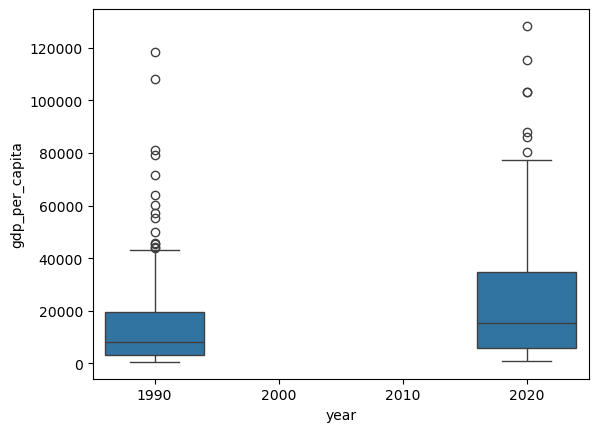

In [62]:
sns.boxplot(x=gdp_decades.year, y=gdp_2.gdp_per_capita);

This is showing that in 2020, countries overall had a higher gdp

In [64]:
gdp_1990 = gdp_df.loc[gdp_df.year == 1990]
gdp_1990.head(2)

,country,year,gdp_per_capita
57,Africa Eastern and Southern,1990,3386.854480
91,Africa Western and Central,1990,3299.401375


In [65]:
gdp_2020 = gdp_df.loc[gdp_df.year == 2020]
gdp_2020.head(2)

,country,year,gdp_per_capita
3,Afghanistan,2020,2769.685745
27,Africa Eastern and Southern,2020,3861.111238


In [66]:
combined_years = pd.merge(gdp_1990, gdp_2020, 
                               on = 'country')
combined_years

,country,year_x,gdp_per_capita_x,year_y,gdp_per_capita_y
0,Africa Eastern and Southern,1990,3386.854480,2020,3861.111238
1,Africa Western and Central,1990,3299.401375,2020,4622.731427
2,Albania,1990,5327.747458,2020,14650.395929
3,Algeria,1990,11728.545729,2020,14194.155748
4,Andorra,1990,50036.300776,2020,55488.490299
...,...,...,...,...,...
228,Vanuatu,1990,3101.680551,2020,3259.995437
229,Viet Nam,1990,2467.964601,2020,11851.396569
230,World,1990,11207.386344,2020,18600.986362
231,Zambia,1990,2425.111287,2020,3391.595412


In [67]:
combined_years['difference'] = combined_years.gdp_per_capita_y - combined_years.gdp_per_capita_x
combined_years

,country,year_x,gdp_per_capita_x,year_y,gdp_per_capita_y,difference
0,Africa Eastern and Southern,1990,3386.854480,2020,3861.111238,474.256758
1,Africa Western and Central,1990,3299.401375,2020,4622.731427,1323.330052
2,Albania,1990,5327.747458,2020,14650.395929,9322.648471
3,Algeria,1990,11728.545729,2020,14194.155748,2465.610019
4,Andorra,1990,50036.300776,2020,55488.490299,5452.189523
...,...,...,...,...,...,...
228,Vanuatu,1990,3101.680551,2020,3259.995437,158.314887
229,Viet Nam,1990,2467.964601,2020,11851.396569,9383.431968
230,World,1990,11207.386344,2020,18600.986362,7393.600018
231,Zambia,1990,2425.111287,2020,3391.595412,966.484125


In [68]:
combined_years_negative = combined_years.loc[combined_years.difference < 0]
combined_years_negative.head(2)

,country,year_x,gdp_per_capita_x,year_y,gdp_per_capita_y,difference
10,Aruba,1990,34579.220640,2020,28521.688852,-6057.531788
16,Barbados,1990,16976.761648,2020,15749.038017,-1227.723631


In [69]:
combined_years_negative.reset_index(drop=True)

,country,year_x,gdp_per_capita_x,year_y,gdp_per_capita_y,difference
0,Aruba,1990,34579.220640,2020,28521.688852,-6057.531788
1,Barbados,1990,16976.761648,2020,15749.038017,-1227.723631
2,Brunei,1990,118163.683198,2020,80280.897948,-37882.785250
3,Burundi,1990,1396.077627,2020,833.920257,-562.157369
4,Central African Republic,1990,1481.252551,2020,1136.570530,-344.682021
5,Congo,1990,8699.526839,2020,6350.509134,-2349.017705
6,Dem. Rep. Congo,1990,2172.001597,2020,1277.632863,-894.368734
7,Fragile and conflict affected situations,1990,6062.707946,2020,5271.014406,-791.693539
8,Gabon,1990,23884.810700,2020,18681.484074,-5203.326626
9,Haiti,1990,3946.365646,2020,3229.475544,-716.890102


This is a list above showing the countries that had a lower GDP per capita in 2020 than 1990.

## Question 14: Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [72]:
internet_df = pd.read_csv('../data/internet_use.csv')

In [73]:
internet_df.head(2)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,17.6,1
1,Afghanistan,2018,16.8,2


In [74]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object

## Question 15: Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [76]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])
internet_df.head(2)

,Country or Area,Year,Value
0,Afghanistan,2019,17.6
1,Afghanistan,2018,16.8


In [77]:
internet_df = internet_df.rename(columns = {'Country or Area':'country','Year':'year','Value':'internet_users_pct'})
internet_df.head(2)

,country,year,internet_users_pct
0,Afghanistan,2019,17.6
1,Afghanistan,2018,16.8


## Question 16: Look at the number of observations in this dataset per year. What do you notice?

In [79]:
internet_df.year.value_counts()

year
1990    226
2007    217
2011    214
2008    214
2009    214
2002    214
2006    212
2001    212
2005    212
2004    210
2000    210
2010    209
2012    209
2003    208
1999    207
2016    206
2017    205
2014    204
2015    203
2013    203
1998    195
1997    188
2021    186
2020    186
2019    185
2022    184
1996    177
2018    174
1995    141
1994     92
1993     66
1992     50
1991     39
2023     11
Name: count, dtype: int64

It seems like countries stopped reporting on this as 1990 has more the most and older years had more countries listed than newer years.

## Question 17: What is the first year to have a non-zero internet users percentage value?

In [82]:
internet_df.loc[internet_df['internet_users_pct'] > 0].sort_values(by = 'year', ascending = True).head(2)

,country,year,internet_users_pct
1570,Denmark,1990,0.097277
2892,Japan,1990,0.020294


1990 is the first year with a "non-zero internet usage"

## Question 18: How does the distribution of internet users percent differ for 2000 and 2014?

In [85]:
combined_internet = internet_df.loc[(internet_df.year == 2000) | (internet_df.year == 2014)]
combined_internet

,country,year,internet_users_pct
5,Afghanistan,2014,7.000000
28,Albania,2014,54.300000
42,Albania,2000,0.114097
57,Algeria,2014,29.500000
71,Algeria,2000,0.491706
...,...,...,...
6017,Yemen,2000,0.082500
6031,Zambia,2014,6.500000
6045,Zambia,2000,0.191072
6061,Zimbabwe,2014,16.364700


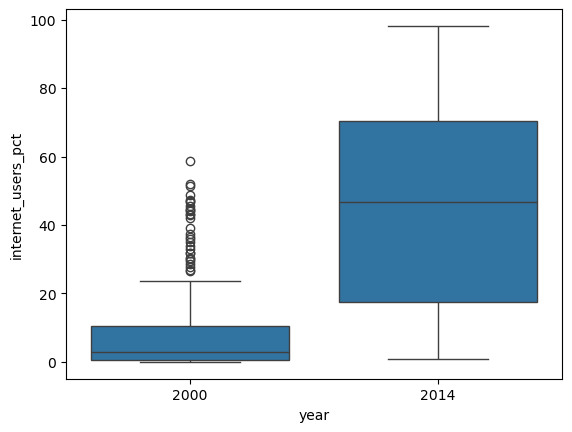

In [86]:
sns.boxplot(x=combined_internet.year, y=combined_internet.internet_users_pct);

## Question 19: For how many countries was the percentage of internet users below 5% in 2014?

In [88]:
internet2014 = internet_df.loc[(internet_df.year == 2014) & (internet_df.internet_users_pct < 5)]
internet2014

,country,year,internet_users_pct
873,Burundi,2014,1.04239
1033,Central African Republic,2014,2.70000
1061,Chad,2014,2.90000
1517,Democratic Republic of the Congo,2014,3.00000
1782,Eritrea,2014,0.99000
2451,Guinea-Bissau,2014,3.32000
3364,Madagascar,2014,3.70000
4073,Niger,2014,1.24868
5055,Somalia,2014,1.63000
5116,South Sudan,2014,2.60000


In [89]:
internet2014.reset_index(drop=True)

,country,year,internet_users_pct
0,Burundi,2014,1.04239
1,Central African Republic,2014,2.70000
2,Chad,2014,2.90000
3,Democratic Republic of the Congo,2014,3.00000
4,Eritrea,2014,0.99000
5,Guinea-Bissau,2014,3.32000
6,Madagascar,2014,3.70000
7,Niger,2014,1.24868
8,Somalia,2014,1.63000
9,South Sudan,2014,2.60000


10 Countries were less than 5% for internet usage in 2014.

## Question 20: Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [92]:
gdp_df.head(2)

,country,year,gdp_per_capita
0,Afghanistan,2023,1992.424394
1,Afghanistan,2022,1981.710168


In [93]:
internet_df.head(2)

,country,year,internet_users_pct
0,Afghanistan,2019,17.6
1,Afghanistan,2018,16.8


In [94]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df,
                                on = ['country', 'year'],
                                how = 'outer')
gdp_and_internet_use.head(2)

,country,year,gdp_per_capita,internet_users_pct
0,Afghanistan,1990,NaN,0.0
1,Afghanistan,2000,1617.826475,NaN


## Question 21: Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

In [96]:
gdp_and_internet_use.loc[gdp_and_internet_use['year'] == 2014].sort_values(by = 'internet_users_pct', ascending = False).head(3)

,country,year,gdp_per_capita,internet_users_pct
3944,Iceland,2014,57981.199448,98.158
2867,Falkland (Malvinas) Islands,2014,NaN,97.600
824,Bermuda,2014,92298.387811,96.800


In [97]:
top3 = gdp_and_internet_use.loc[gdp_and_internet_use['country'].isin(['Iceland','Falkland (Malvinas) Islands','Bermuda'])]
top3

,country,year,gdp_per_capita,internet_users_pct
800,Bermuda,1990,79109.890650,0.0000
801,Bermuda,1991,75754.494259,NaN
802,Bermuda,1992,75160.932166,NaN
803,Bermuda,1993,76883.813796,NaN
804,Bermuda,1994,76850.912239,NaN
...,...,...,...,...
3949,Iceland,2019,65065.905682,99.5049
3950,Iceland,2020,59575.190393,99.5328
3951,Iceland,2021,61685.835611,99.6870
3952,Iceland,2022,65563.920870,99.8565


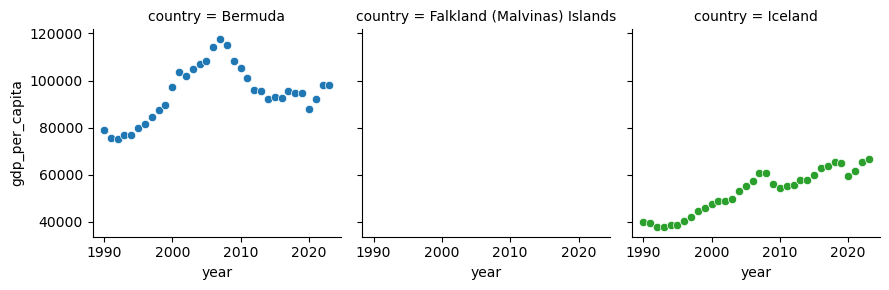

In [98]:
g = sns.FacetGrid(top3, col="country", hue="country")
g.map_dataframe(sns.scatterplot, x="year", y="gdp_per_capita");

I notice that Iceland's GDP increased, Bermuda's went up and then back down and the Islands didn't have GDP data

## Question 22: Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [101]:
gdp_and_internet_use_2014 = gdp_and_internet_use.loc[gdp_and_internet_use.year == 2014]
gdp_and_internet_use_2014.head(2)

,country,year,gdp_per_capita,internet_users_pct
15,Afghanistan,2014,3017.942544,7.0
49,Africa Eastern and Southern,2014,4052.851526,NaN


## Question 23: Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='gdp_per_capita', ylabel='internet_users_pct'>

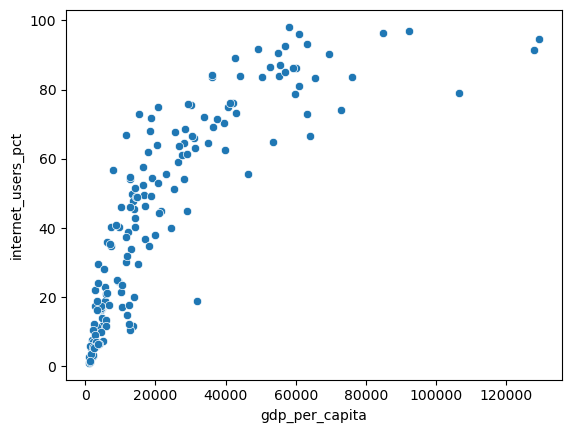

In [103]:
sns.scatterplot(data=gdp_and_internet_use_2014, x="gdp_per_capita", y="internet_users_pct")

In [104]:
gdp_and_internet_use_2014.loc[(gdp_and_internet_use_2014.gdp_per_capita > 100000) & (gdp_and_internet_use_2014.internet_users_pct < 82)]

,country,year,gdp_per_capita,internet_users_pct
7566,Singapore,2014,106604.492771,79.0292


In [105]:
gdp_and_internet_use_2014.loc[(gdp_and_internet_use_2014.gdp_per_capita > 30000) & (gdp_and_internet_use_2014.internet_users_pct < 25)]

,country,year,gdp_per_capita,internet_users_pct
2538,Equatorial Guinea,2014,31765.899706,18.86


## Question 24: Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [107]:
gdp_and_internet_use_2014.gdp_per_capita.describe()

count       247.000000
mean      23007.966333
std       24300.620767
min         977.765840
25%        5407.690144
50%       14247.101002
75%       31475.566725
max      162582.374111
Name: gdp_per_capita, dtype: float64

In [108]:
gdp_and_internet_use_2014['gdp_group'] = pd.qcut(gdp_and_internet_use_2014.gdp_per_capita, q=3, labels=['Low', 'Medium', 'High'])
gdp_and_internet_use_2014.sort_values(by='gdp_group', ascending = False).head(2)

C:\Users\FLRea\AppData\Local\Temp\ipykernel_12220\891673675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['gdp_group'] = pd.qcut(gdp_and_internet_use_2014.gdp_per_capita, q=3, labels=['Low', 'Medium', 'High'])


,country,year,gdp_per_capita,internet_users_pct,gdp_group
4838,Latvia,2014,29217.459341,75.8261,High
2538,Equatorial Guinea,2014,31765.899706,18.8600,High


In [109]:
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014.gdp_group == 'High'].sort_values(by='gdp_per_capita', ascending = True)

,country,year,gdp_per_capita,internet_users_pct,gdp_group
8867,TÃ¼rkiye,2014,24573.488878,NaN,High
7498,Seychelles,2014,25379.418071,51.2547,High
273,Antigua and Barbuda,2014,25565.965684,67.7800,High
2769,Europe & Central Asia (IDA & IBRD),2014,25890.790820,NaN,High
8799,Turks and Caicos Islands,2014,26470.621917,NaN,High
...,...,...,...,...,...
824,Bermuda,2014,92298.387811,96.8000,High
7566,Singapore,2014,106604.492771,79.0292,High
7045,Qatar,2014,128013.987046,91.4900,High
5200,Luxembourg,2014,129443.183641,94.6702,High


## Question 25: Stretch Question: How does the median internet users percentage compare for the three gdp groups?

In [111]:
high_gdp = gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014.gdp_group == 'High']
high_gdp = high_gdp.reset_index(drop=True)
high_gdp.head(2)

,country,year,gdp_per_capita,internet_users_pct,gdp_group
0,Andorra,2014,59929.244467,86.10,High
1,Antigua and Barbuda,2014,25565.965684,67.78,High


In [112]:
medium_gdp = gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014.gdp_group == 'Medium']
medium_gdp = medium_gdp.reset_index(drop=True)
medium_gdp.head(2)

,country,year,gdp_per_capita,internet_users_pct,gdp_group
0,Albania,2014,12788.747231,54.3,Medium
1,Algeria,2014,15073.762940,29.5,Medium


In [113]:
low_gdp = gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014.gdp_group == 'Low']
low_gdp = low_gdp.reset_index(drop=True)
low_gdp.head(2)

,country,year,gdp_per_capita,internet_users_pct,gdp_group
0,Afghanistan,2014,3017.942544,7.0,Low
1,Africa Eastern and Southern,2014,4052.851526,NaN,Low


In [114]:
high_gdp.internet_users_pct.median()

75.97999999999999

In [115]:
medium_gdp.internet_users_pct.median()

44.5945

In [116]:
low_gdp.internet_users_pct.median()

11.600000000000001

In [117]:
gdp_and_internet_use_2014.groupby('gdp_group', observed=True)['internet_users_pct'].median()

gdp_group
Low       11.6000
Medium    44.5945
High      75.9800
Name: internet_users_pct, dtype: float64

## Bonus Exercise: Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.

In [119]:
mobile_df = pd.read_csv('../data/mobile_users_100.csv')

In [120]:
mobile_df = mobile_df.drop(columns = ['Value Footnotes'])

In [121]:
mobile_df.head(2)

,Country or Area,Year,Value
0,Afghanistan,2022,55.5132
1,Afghanistan,2021,56.5544


In [122]:
mobile_df = mobile_df.rename(columns = {'Country or Area':'country','Year':'year','Value':'mobile_users_per_100'})
mobile_df.head(2)

,country,year,mobile_users_per_100
0,Afghanistan,2022,55.5132
1,Afghanistan,2021,56.5544


In [123]:
combined_dfs = pd.merge(mobile_df, gdp_and_internet_use, on = ['country','year'], how = 'inner')

In [124]:
combined_dfs.head()

,country,year,mobile_users_per_100,gdp_per_capita,internet_users_pct
0,Afghanistan,2022,55.5132,1981.710168,NaN
1,Afghanistan,2021,56.5544,2144.166570,NaN
2,Afghanistan,2020,58.1902,2769.685745,NaN
3,Afghanistan,2019,59.7839,2927.245144,17.6
4,Afghanistan,2018,59.9026,2902.392113,16.8


In [125]:
combined_dfs.describe()

,year,mobile_users_per_100,gdp_per_capita,internet_users_pct
count,6620.000000,6620.000000,5427.000000,5952.000000
mean,2006.157100,56.644129,20952.797999,29.387454
std,9.356857,54.902779,23360.593038,31.366526
min,1990.000000,0.000000,510.822823,0.000000
25%,1998.000000,1.542728,4091.494488,1.401987
50%,2006.000000,45.369350,11828.711377,16.000000
75%,2014.000000,104.031500,30473.150202,55.227500
max,2022.000000,420.853000,145591.019357,100.000000


In [126]:
combined_dfs.loc[combined_dfs.mobile_users_per_100 > 400]

,country,year,mobile_users_per_100,gdp_per_capita,internet_users_pct
1309,"China, Macao Special Administrative Region",2019,420.853,NaN,86.4679


In [127]:
combined_dfs.loc[combined_dfs.year == 2020].sort_values(by = 'mobile_users_per_100', ascending = True)

,country,year,mobile_users_per_100,gdp_per_capita,internet_users_pct
3960,Micronesia,2020,19.6243,3839.258969,39.3833
5129,Samoa,2020,32.1036,6745.306396,69.9561
3477,Liberia,2020,32.4909,1497.376924,27.4519
1143,Central African Republic,2020,34.2690,1136.570530,NaN
3828,Marshall Islands,2020,36.8545,6417.184412,71.2288
...,...,...,...,...,...
3509,Libya,2020,174.6930,9976.037403,87.5754
6253,United Arab Emirates,2020,197.8440,65784.676939,100.0000
177,Antigua and Barbuda,2020,198.5670,23915.161984,86.8837
1308,"China, Macao Special Administrative Region",2020,239.7250,NaN,87.4623


In [128]:
combined_dfs.loc[combined_dfs.year == 1990].sort_values(by = 'mobile_users_per_100', ascending = False)

,country,year,mobile_users_per_100,gdp_per_capita,internet_users_pct
5770,Sweden,1990,5.39516,40169.094717,0.584192
2182,Finland,1990,5.17136,38750.072538,0.401088
4553,Norway,1990,4.64038,57055.326086,0.707299
2819,Iceland,1990,3.92520,40081.958967,0.000000
1713,Denmark,1990,2.88107,45779.707401,0.097277
...,...,...,...,...,...
2655,Guinea-Bissau,1990,0.00000,1913.549909,0.000000
2687,Guyana,1990,0.00000,5074.430935,0.000000
2720,Haiti,1990,0.00000,3946.365646,0.000000
2753,Honduras,1990,0.00000,4427.040221,0.000000


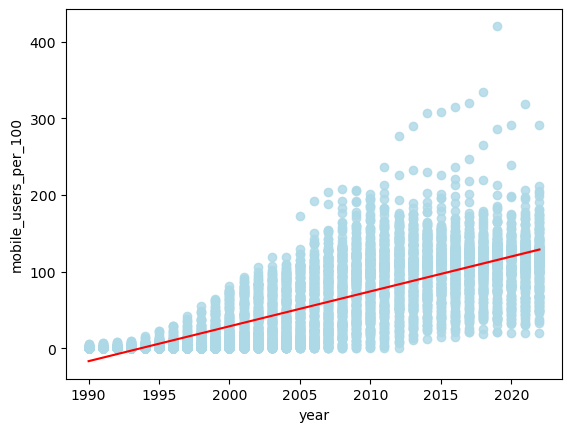

In [129]:
sns.regplot(x='year', y='mobile_users_per_100', data=combined_dfs, line_kws={'color': 'red', 'linewidth': 1.5}, color = 'lightblue');

In [130]:
combined_dfs.loc[(combined_dfs.year == 2005) & (combined_dfs.mobile_users_per_100 > 150)]

,country,year,mobile_users_per_100,gdp_per_capita,internet_users_pct
1136,Cayman Islands,2005,173.23,NaN,38.0344


In [131]:
population = pd.read_csv('../data/population.csv')

In [132]:
population.head(2)

,Country or Area,Year(s),Variant,Value
0,ADB region: Central and West Asia,2022,Medium,380592.238
1,ADB region: Central and West Asia,2021,Medium,374238.111


In [133]:
population = population.drop(columns = ['Variant'])
population.head(2)

,Country or Area,Year(s),Value
0,ADB region: Central and West Asia,2022,380592.238
1,ADB region: Central and West Asia,2021,374238.111


In [134]:
population = population.rename(columns = {'Country or Area':'country','Year(s)':'year','Value':'pop_in_thous'})
population.head(2)

,country,year,pop_in_thous
0,ADB region: Central and West Asia,2022,380592.238
1,ADB region: Central and West Asia,2021,374238.111


In [135]:
combined_dfs2 = pd.merge(population, combined_dfs, on = ['country', 'year'], how = 'right')

In [136]:
combined_dfs2.head()

,country,year,pop_in_thous,mobile_users_per_100,gdp_per_capita,internet_users_pct
0,Afghanistan,2022,40578.842,55.5132,1981.710168,NaN
1,Afghanistan,2021,40000.412,56.5544,2144.166570,NaN
2,Afghanistan,2020,39068.979,58.1902,2769.685745,NaN
3,Afghanistan,2019,37856.121,59.7839,2927.245144,17.6
4,Afghanistan,2018,36743.039,59.9026,2902.392113,16.8


In [137]:
combined_dfs2.loc[(combined_dfs2.year == 2005) & (combined_dfs2.mobile_users_per_100 > 150)]

,country,year,pop_in_thous,mobile_users_per_100,gdp_per_capita,internet_users_pct
1136,Cayman Islands,2005,46.788,173.23,NaN,38.0344


In [138]:
combined_dfs2['mobile_users_per_1000'] = combined_dfs2['mobile_users_per_100']*10

In [139]:
combined_dfs2.head(2)

,country,year,pop_in_thous,mobile_users_per_100,gdp_per_capita,internet_users_pct,mobile_users_per_1000
0,Afghanistan,2022,40578.842,55.5132,1981.710168,NaN,555.132
1,Afghanistan,2021,40000.412,56.5544,2144.166570,NaN,565.544


In [140]:
combined_dfs2['percent_of_pop_using_cellphones'] = combined_dfs2['mobile_users_per_1000']/combined_dfs2['pop_in_thous']
combined_dfs2

,country,year,pop_in_thous,mobile_users_per_100,gdp_per_capita,internet_users_pct,mobile_users_per_1000,percent_of_pop_using_cellphones
0,Afghanistan,2022,40578.842,55.5132,1981.710168,NaN,555.132,0.013680
1,Afghanistan,2021,40000.412,56.5544,2144.166570,NaN,565.544,0.014138
2,Afghanistan,2020,39068.979,58.1902,2769.685745,NaN,581.902,0.014894
3,Afghanistan,2019,37856.121,59.7839,2927.245144,17.600000,597.839,0.015792
4,Afghanistan,2018,36743.039,59.9026,2902.392113,16.800000,599.026,0.016303
...,...,...,...,...,...,...,...,...
6615,Zimbabwe,1994,10873.148,0.0000,3965.730986,0.001739,0.000,0.000000
6616,Zimbabwe,1993,10860.288,0.0000,3634.750494,NaN,0.000,0.000000
6617,Zimbabwe,1992,10702.700,0.0000,3649.891947,NaN,0.000,0.000000
6618,Zimbabwe,1991,10404.816,0.0000,4126.405247,NaN,0.000,0.000000


In [141]:
combined_dfs2.loc[(combined_dfs2.year == 2005) & (combined_dfs2.mobile_users_per_100 > 150)]

,country,year,pop_in_thous,mobile_users_per_100,gdp_per_capita,internet_users_pct,mobile_users_per_1000,percent_of_pop_using_cellphones
1136,Cayman Islands,2005,46.788,173.23,NaN,38.0344,1732.3,37.024451


In [142]:
combined_dfs2.loc[combined_dfs2.mobile_users_per_100 > 400]

,country,year,pop_in_thous,mobile_users_per_100,gdp_per_capita,internet_users_pct,mobile_users_per_1000,percent_of_pop_using_cellphones
1309,"China, Macao Special Administrative Region",2019,NaN,420.853,NaN,86.4679,4208.53,NaN


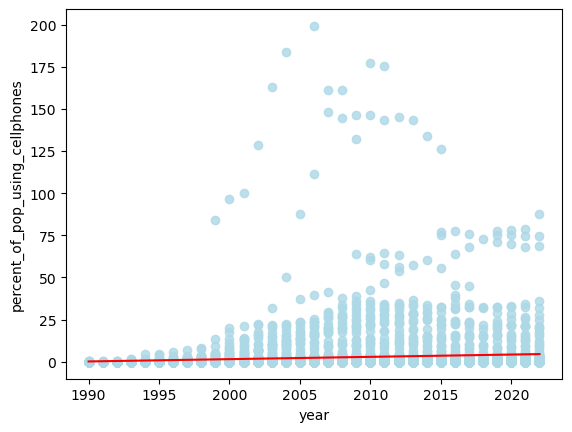

In [143]:
sns.regplot(x='year', y='percent_of_pop_using_cellphones', data=combined_dfs2, line_kws={'color': 'red', 'linewidth': 1.5}, color = 'lightblue');